# Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
    1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
    2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment
    b. what statistical test(s) you will conduct to verify the significance of the observation
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

1. key measure of success of this experiment to collect the number of passing the toll bridge from one city to another city and vice versa. As they driver pass the toll bridge, which means that driver will be available in both cities. The observation can be collected in weekday and weekend. If the stimulus does not need to be happen during the weekend, the city will save the funds for reimbursing.

2. Divide the drivers randomly into two groups from both cities and measure the number of cross-bridge trips for each.
    Group A: control, do not receive the reimbursement
    Groub B: recieves reimbursement 

    We will measure the number of rides that originate in one city and end in the other for each group. One set of data should be collected in a week span. And the experiment should be repeated at least three times in weeks at similar week, meaning that holiday week is not comparable with 'normal' week.

    For this experiment, we use A/B hypothesis testing, with the null hypothesis being: there is no differences for the number of trips between Group A and B. The data should be analzyed for normality and cleaning. Depending on the shape of the data parametric or non-parametric statistical tests may be used.

# Part 3 ‑ Predictive modeling

In [1]:
#load packagee
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import numpy as np

In [2]:
f = open('ultimate_data_challenge.json')
# returns JSON object as 
# a dictionary
data = json.load(f)
df = pd.DataFrame(data)

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [6]:
# fill NA
#because 0 would not work for all values filling was done per column
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(0)
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(0)
df['phone'] = df['phone'].fillna('Unknown')

In [7]:
df['last_trip_date'] = pd.to_datetime(df.last_trip_date)

In [8]:
most_recent= df.last_trip_date.max()
print('The most recent trip in the dataset occured on {}'.format(most_recent))

The most recent trip in the dataset occured on 2014-07-01 00:00:00


The last_trip_date is before 2014-06-01 will be labeled inactive 0. and after 2014-06-01 will be 'Active' value of 1

In [9]:
df["Active"] = np.where(df["last_trip_date"] >= '2014-06-01', 1, 0)

In [10]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [11]:
df.Active.value_counts(normalize=True) 

0    0.62392
1    0.37608
Name: Active, dtype: float64

In [12]:
print('Percent of Drivers Retained: {}%'.format(round(0.37608, 2)))
print('Precent of Drivers Not Retained: {}%'.format(round(0.62392, 2)))

Percent of Drivers Retained: 0.38%
Precent of Drivers Not Retained: 0.62%


# EDA

sns.barplot(x='Active', y='avg_surge', data = df)

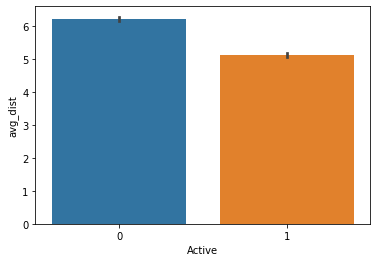

In [13]:
sns.barplot(x='Active', y='avg_dist', data = df)

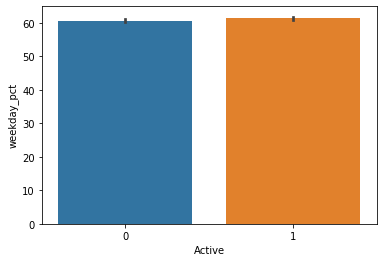

In [14]:
sns.barplot(x='Active', y='weekday_pct', data = df)

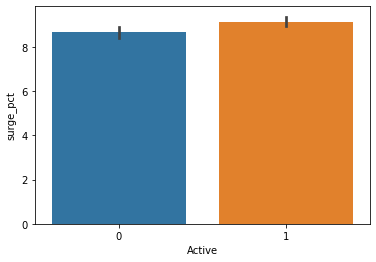

In [15]:
sns.barplot(x='Active', y='surge_pct', data = df)

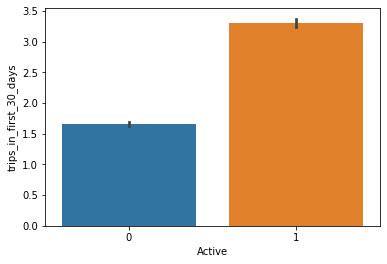

In [16]:
sns.barplot(x='Active', y='trips_in_first_30_days', data = df)

In [21]:
df.groupby('city')['Active'].value_counts(normalize=True)

city            Active
Astapor         0         0.744285
                1         0.255715
King's Landing  1         0.628134
                0         0.371866
Winterfell      0         0.648055
                1         0.351945
Name: Active, dtype: float64

Active group likes going to city King's Landing.

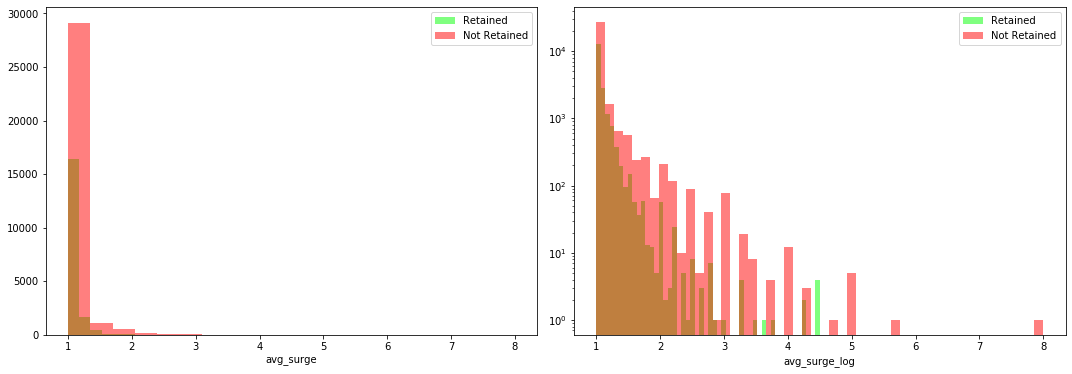

In [22]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.distplot(df[df.Active == 1].avg_surge, kde=False, bins =20, label= 'Retained', hist_kws={"lw":5, "facecolor":(0,1,0,0.1),"alpha":0.5})
sns.distplot(df[df.Active == 0].avg_surge, kde=False, bins=20, label= 'Not Retained', hist_kws={"lw":5, "facecolor":(1,0,0,0.25),"alpha":0.5})
plt.legend()
plt.xlabel("avg_surge")

plt.subplot(2, 2, 2)
sns.distplot(df[df.Active == 1].avg_surge, kde=False, label= 'Retained', hist_kws={"lw":5, "facecolor":(0,1,0,0.1),"alpha":0.5})
sns.distplot(df[df.Active == 0].avg_surge, kde=False, label= 'Not Retained', hist_kws={"lw":5, "facecolor":(1,0,0,0.25),"alpha":0.5})
plt.legend()
plt.xlabel("avg_surge_log")
plt.yscale("log")

plt.tight_layout()

Text(0.5, 0, 'trips_in_first_30_days')

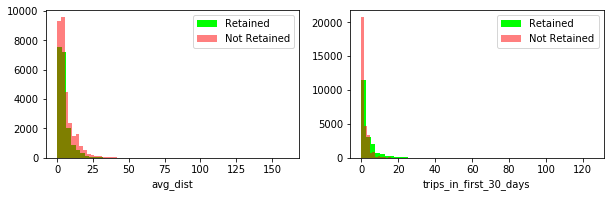

In [23]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.distplot(df[df.Active == 1].avg_dist, kde=False, label= 'Retained', hist_kws={"lw":5, "facecolor":(0,1,0,0.1),"alpha":1})
sns.distplot(df[df.Active == 0].avg_dist, kde=False, label = 'Not Retained', hist_kws={"lw":5, "facecolor":(1,0,0,0.25),"alpha":0.5})
plt.legend()
plt.xlabel("avg_dist")

plt.subplot(2, 2, 2)
sns.distplot(df[df.Active == 1].trips_in_first_30_days, kde=False, label= 'Retained', hist_kws={"lw":5, "facecolor":(0,1,0,0.1),"alpha":1})
sns.distplot(df[df.Active == 0].trips_in_first_30_days, kde=False, label = 'Not Retained', hist_kws={"lw":5, "facecolor":(1,0,0,0.25),"alpha":0.5})
plt.legend()
plt.xlabel("trips_in_first_30_days")

# model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

data preprocessing

In [25]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'Active'],
      dtype='object')

In [26]:
#select the category variables
df.select_dtypes('object').columns

Index(['city', 'signup_date', 'phone'], dtype='object')

Convert Categorical Variables/non-numeric variables to Dummies or drop : city; signup_date: signups are coming from the same months, drop this column; last_trip_date: drop this column, data leak regarding our target variabes; phone: not reasonable to use. convert it to an informative numeric variables; ultimate_black_user: Get dummies

In [27]:
# Make a copy of df
df = df.copy()

# Drop columns shown above
df.drop(columns=['signup_date', 'last_trip_date', 'phone'], inplace=True)

# get dummies for city and ultimate_black
df = pd.get_dummies(data=df, columns= ['city', 'ultimate_black_user'])
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,Active,city_Astapor,city_King's Landing,city_Winterfell,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,0,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,1,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,1,1,0


In [28]:
df.dtypes

trips_in_first_30_days         int64
avg_rating_of_driver         float64
avg_surge                    float64
surge_pct                    float64
weekday_pct                  float64
avg_dist                     float64
avg_rating_by_driver         float64
Active                         int64
city_Astapor                   uint8
city_King's Landing            uint8
city_Winterfell                uint8
ultimate_black_user_False      uint8
ultimate_black_user_True       uint8
dtype: object

# Train_test_split

In [29]:
# Create input variables
X= df.drop(columns='Active')
# Set target variable to be retention column
y= df.Active

# Split into training and test and maintain class frequencies
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, stratify= y)

# Scale X
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

# Make sure vectors are of proper shape
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(37500, 12)
(37500,)
(12500, 12)
(12500,)


In [30]:
from sklearn.decomposition import PCA
pca = PCA()
X_scaled = scaler.fit_transform(X)
pca_components = pca.fit(X_scaled)

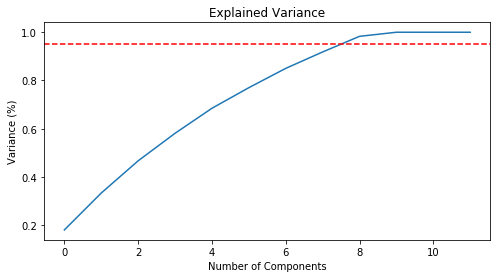

In [31]:
plt.figure(figsize=(8,4))

plt.plot(np.cumsum(pca_components.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.axhline(y=0.95, color='r',linestyle='--')
plt.title('Explained Variance')
plt.show()

about 8 components to explain the majority of the variance in these data

# logistic regression

In [32]:
model_name= 'Logistic Regression'
model= LogisticRegression()
# fit the model
res = model.fit(X_train_scaled, y_train)
# make predictions
y_pred= model.predict(X_test_scaled)

# computer average score
avg_score= round(accuracy_score(y_test, y_pred),2)
print('{} Accuracy Score: {}'.format(model_name,avg_score))

# compute classification report
report= classification_report(y_test, y_pred)
print('Classification Report for {} Model'.format(model_name))
print(report)

Logistic Regression Accuracy Score: 0.71
Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

           0       0.73      0.86      0.79      7799
           1       0.66      0.46      0.54      4701

    accuracy                           0.71     12500
   macro avg       0.69      0.66      0.66     12500
weighted avg       0.70      0.71      0.69     12500



/Users/dongw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


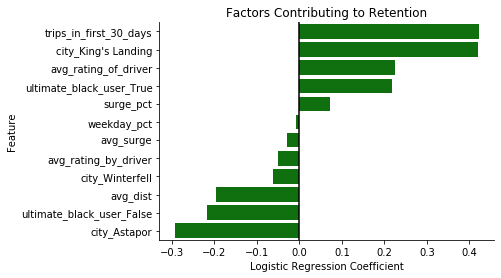

In [36]:

# Visualizing Feature Importance from the Logistic Regression
# create empty df
logit_df= pd.DataFrame()

coefficients= res.coef_.tolist()[0]
features= list(X_train.columns)

# Add features and their importance to the dataframe
logit_df['Feature']= features
logit_df['Coefficient']= coefficients

# Sort the dataframe by coefficient value
logit_df= logit_df.sort_values(by='Coefficient', ascending=False )

# plot the dataframe 
sns.barplot(x='Coefficient', y= 'Feature', data=logit_df, color='g')
plt.title('Factors Contributing to Retention')
plt.xlabel('Logistic Regression Coefficient')
plt.axvline(x=0, color='black')
sns.despine()

contributing features include trips_in_first_30_days, city_king, avg_rating of driver and surge_pct

# RandomForestClassifier


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=21)

model = RandomForestClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# computer average score
avg_score= round(accuracy_score(y_test, y_pred),2)
print('{} Accuracy Score: {}'.format(model_name,avg_score))

# compute classification report
report= classification_report(y_test, y_pred)
print('Classification Report for {} Model'.format(model_name))
print(report)

/Users/dongw/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Logistic Regression Accuracy Score: 0.74
Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      7795
           1       0.67      0.60      0.63      4705

    accuracy                           0.74     12500
   macro avg       0.72      0.71      0.72     12500
weighted avg       0.73      0.74      0.74     12500



In [41]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[6389 1406]
 [1866 2839]]


In [45]:
def feature_importance(model, ax, label):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(20).plot(kind='barh', ax=ax, label=label)
    plt.title(label)

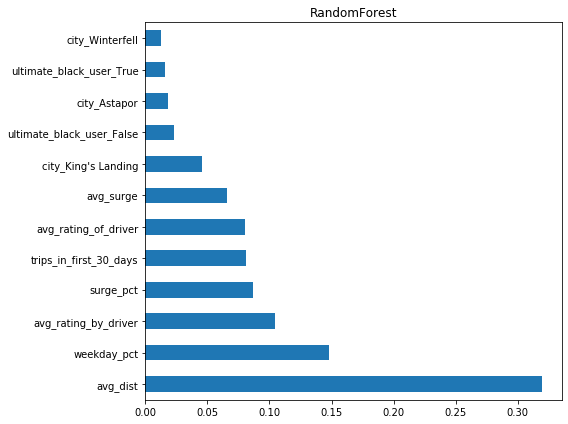

In [49]:
#Feature Importance (RF)
fig, ax=plt.subplots(1,1, figsize=(8,6))
feature_importance(model, ax, 'RandomForest')
plt.tight_layout()

# Conclusion

The method Random forest shown a bit more accurancy than LR, features trips_in first_30 days, avg_rating by driver, surge_pct, weekday_pct, would help predict the retention of user in 6 months. Some other info such as how many times travel and encourage them to rate driver would give more evidences about how they would a retention rider.